<a href="https://colab.research.google.com/github/CristobalSVM/Datos_Masivos/blob/main/Pr%C3%A1ctica_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = pd.read_excel('/content/renovaciones mayo 2023 DM.xlsx')

# Separamos variables
X = data.drop('renovacion', axis=1)
y = data['renovacion']



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

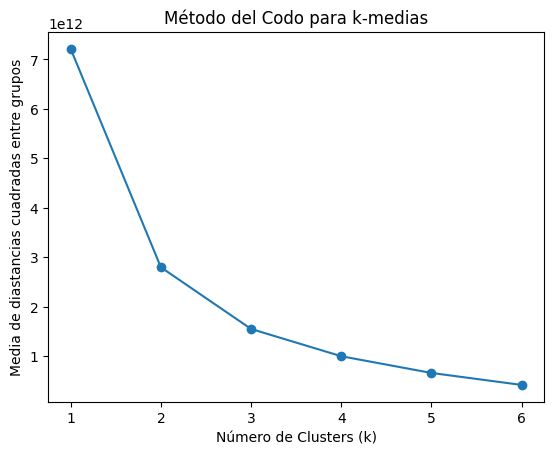

In [9]:
# Determinar el número óptimo de clusters mediante el método del codo
inertia = []
n_cluster = []
for k in range(1, 7):  # Se generan 6 cluster por tener 6 variables
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Agrega inertia a la lista
    n_cluster.append(k)


plt.plot(range(1, 7), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Media de diastancias cuadradas entre grupos')
plt.title('Método del Codo para k-medias')
plt.show()


In [10]:
df_inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
df_inertias

,n_clusters,inertia
0,1,7.212708e+12
1,2,2.793934e+12
2,3,1.546247e+12
3,4,9.943750e+11
4,5,6.559874e+11
5,6,4.137240e+11


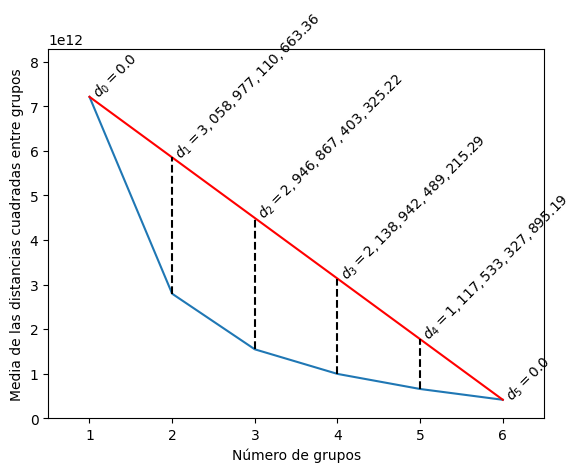

In [11]:
# De aquí sacamos la ecuación de la recta entre el punto primero y último

from numpy import ones,vstack
from numpy.linalg import lstsq
points = [
    (df_inertias.iloc[0, :].n_clusters, df_inertias.iloc[0, :].inertia),
    (df_inertias.iloc[-1, :].n_clusters, df_inertias.iloc[-1, :].inertia)
]
x_coords, y_coords = zip(*points)
A = vstack([x_coords, ones(len(x_coords))]).T
m, b = lstsq(A, y_coords, rcond=None)[0]

plt.figure()
plt.plot(df_inertias.n_clusters, df_inertias.inertia)
plt.plot(df_inertias.iloc[[0, -1], :].n_clusters, df_inertias.iloc[[0, -1], :].inertia, c='r')
for i, r in df_inertias.iterrows():
    d = '$d_{' + str(i) + '}' + f' = {abs(round(r.inertia - (m * r.n_clusters + b), 2)):,}$'
    plt.annotate(d, xytext=(r.n_clusters, m * r.n_clusters + b), xy=(r.n_clusters, m * r.n_clusters + b), rotation = 45)
    plt.plot([r.n_clusters, r.n_clusters], [r.inertia, m * r.n_clusters + b], '--k')
plt.xlabel('Número de grupos')
plt.ylabel('Media de las distancias cuadradas entre grupos')
plt.xlim((0.5, 6.5))
plt.ylim((0, 1.15 * df_inertias.inertia.max()))
plt.xticks(range(1, 7))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


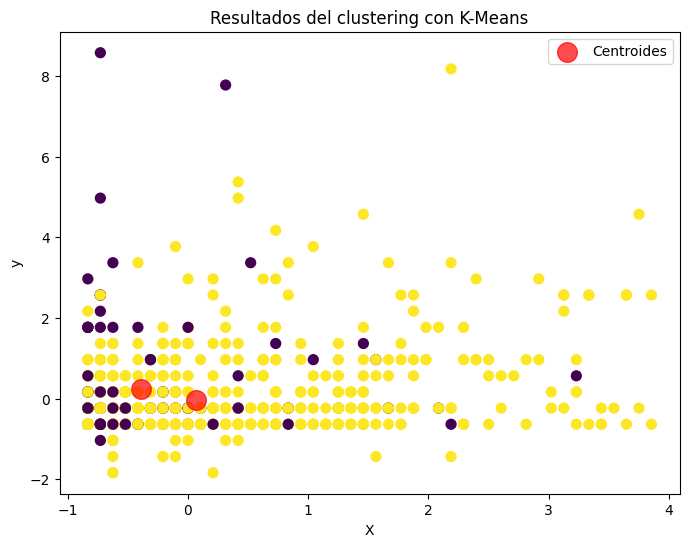

In [12]:
# Aplicamos k-medias
n_clusters_kmeans = 2  # Número de clusters óptimo determinado en el paso anterior
kmeans = KMeans(n_clusters=n_clusters_kmeans)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Centroides')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Resultados del clustering con K-Means')
plt.show()

Dado que los datos tienen las caracteristicas muy similares entre ciclos, monto otorgado e integrantes, esperaba que estuvieran más compacta los 2 clusters con sus respectivos elementos.

Este resultado puede deberse a que no se tienen mayor cantidad de variables y ha que hay variables binarias en el conjunto de datos.